<a href="https://colab.research.google.com/github/whiteevl/machine-learning/blob/main/udah_jadi_ajg_tinggal_rapihin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:


#import data ke variabel untuk dibaca
news_data = pd.read_csv('googleplaystore.csv', sep=',')

#cek 5 data teratas
news_data.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
news_data.shape

(10841, 13)

In [5]:
news_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
print(news_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [9]:
news_data.Type.value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [10]:
news_data = news_data.drop(columns=['Rating'])
news_data

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [28]:
news_data.Genres.count()

10839

In [34]:
news_data['text'] = news_data['Genres'] + " " + news_data['Category']
news_data

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,text
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design ART_AND_DESIGN
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design;Pretend Play ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design ART_AND_DESIGN
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design;Creativity ART_AND_DESIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Education FAMILY
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Education FAMILY
10838,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,Medical MEDICAL
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Books & Reference BOOKS_AND_REFERENCE


In [35]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.preprocessing import text, sequence
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:


stwd = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stwd.update(punctuation)



In [37]:
# data cleaning
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#hapus square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
#hapus URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)
#hapus stopwords dari text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stwd:
            final_text.append(i.strip())
    return " ".join(final_text)
#hapus noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_url(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
news_data['text']=news_data['text'].apply(denoise_text)

In [38]:


def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(news_data.text)
corpus[:10]



['Art',
 'Design',
 'ART_AND_DESIGN',
 'Art',
 'Design;Pretend',
 'Play',
 'ART_AND_DESIGN',
 'Art',
 'Design',
 'ART_AND_DESIGN']

In [39]:


#jumlah kata yang sering ditemukan
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common



{'FAMILY': 1971,
 'GAME': 1144,
 'TOOLS': 843,
 'Tools': 842,
 'Entertainment': 623,
 'Education': 549,
 'Medical': 463,
 'MEDICAL': 463,
 'Business': 460,
 'BUSINESS': 460}

In [40]:


from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    cv = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_words = cv.transform(corpus)
    sum_words = bag_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



<Axes: >

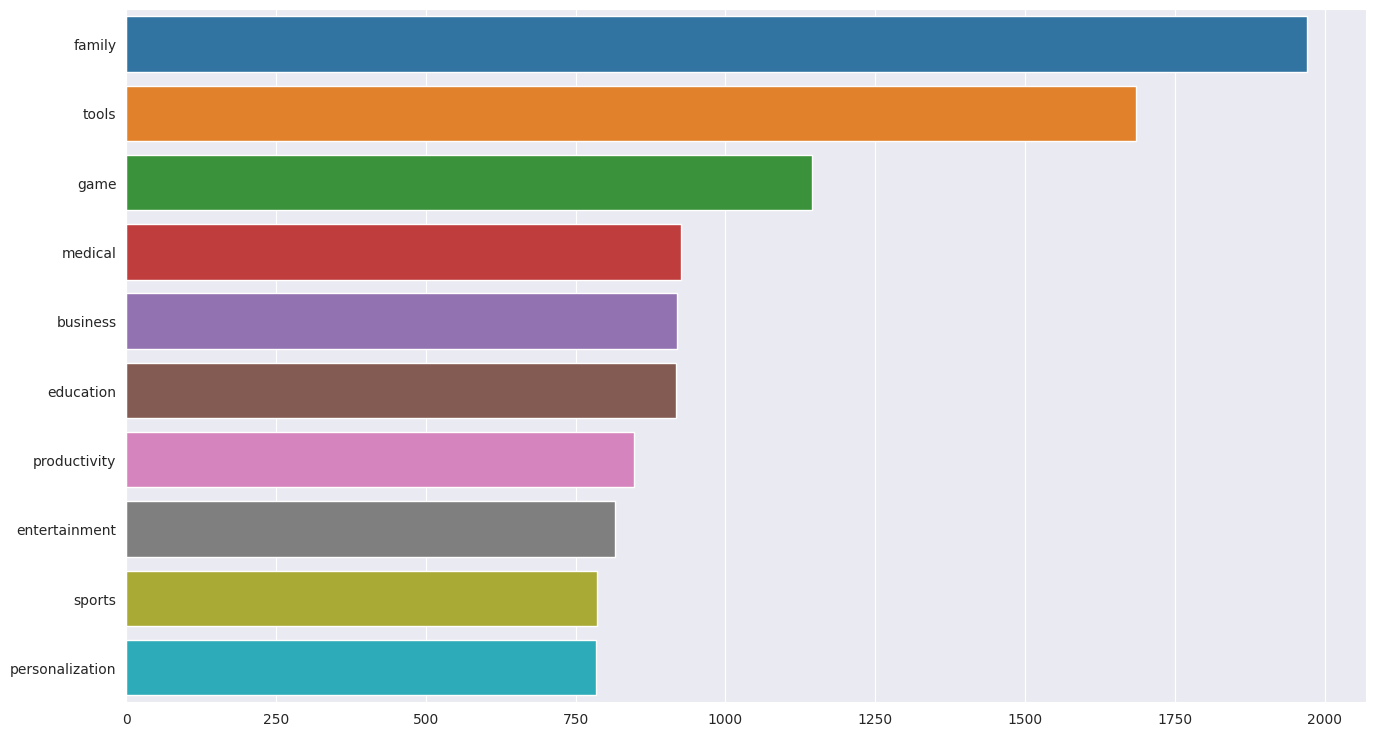

In [41]:


plt.figure(figsize = (16,9))
most_common = get_top_text_ngrams(news_data.text,10,1)
most_common = dict(most_common)
sns.barplot(x=list(most_common.values()),y=list(most_common.keys()))



In [43]:
# data category one-hot-encoding
Type = pd.get_dummies(news_data.Type)
new_cat = pd.concat([news_data, Type], axis=1)
new_cat = new_cat.drop(columns='Type')
new_cat.head(10)

,App,Category,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,text,Free,Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Art Design ART_AND_DESIGN,1,0
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art Design;Pretend Play ART_AND_DESIGN,1,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art Design ART_AND_DESIGN,1,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art Design ART_AND_DESIGN,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art Design;Creativity ART_AND_DESIGN,1,0
5,Paper flowers instructions,ART_AND_DESIGN,167,5.6M,"50,000+",0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,Art Design ART_AND_DESIGN,1,0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19M,"50,000+",0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,Art Design ART_AND_DESIGN,1,0
7,Infinite Painter,ART_AND_DESIGN,36815,29M,"1,000,000+",0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,Art Design ART_AND_DESIGN,1,0
8,Garden Coloring Book,ART_AND_DESIGN,13791,33M,"1,000,000+",0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,Art Design ART_AND_DESIGN,1,0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,121,3.1M,"10,000+",0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,Art Design;Creativity ART_AND_DESIGN,1,0


In [44]:
news = new_cat['text'].values
label = new_cat[['Free', 'Paid']].values

In [45]:
news

array(['Art Design ART_AND_DESIGN',
       'Art Design;Pretend Play ART_AND_DESIGN',
       'Art Design ART_AND_DESIGN', ..., 'Medical MEDICAL',
       'Books Reference BOOKS_AND_REFERENCE', 'Lifestyle LIFESTYLE'],
      dtype=object)

In [46]:
label

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [47]:
x_train,x_test,y_train,y_test = train_test_split(news, label,test_size = 0.2,shuffle=True)

In [48]:


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam



In [49]:


vocab_size = 10000
max_len = 200
trunc_type = "post"
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index

sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
pad_train = pad_sequences(sequences_train, maxlen=max_len, truncating=trunc_type)
pad_test = pad_sequences(sequences_test, maxlen=max_len, truncating=trunc_type)

print(pad_test.shape)



(2168, 200)


In [50]:
pad_train

array([[ 0,  0,  0, ...,  0, 53,  5],
       [ 0,  0,  0, ...,  0, 37,  5],
       [ 0,  0,  0, ...,  0,  8,  8],
       ...,
       [ 0,  0,  0, ...,  0, 23,  5],
       [ 0,  0,  0, ..., 43,  4, 44],
       [ 0,  0,  0, ...,  0, 11, 11]], dtype=int32)

In [51]:
pad_test

array([[ 0,  0,  0, ..., 20,  4, 21],
       [ 0,  0,  0, ...,  0, 10,  2],
       [ 0,  0,  0, ...,  0, 23,  5],
       ...,
       [ 0,  0,  0, ..., 43,  4, 44],
       [ 0,  0,  0, ...,  0, 13, 13],
       [ 0,  0,  0, ...,  0,  9,  9]], dtype=int32)

In [52]:
# model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 755586 (2.88 MB)
Trainable params: 755586 (2.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
      self.model.stop_training = True
      print("\n akurasi dari training set and the validation set telah terpenuhi > 90%!")
callbacks = myCallback()

In [56]:
num_epochs = 50
history = model.fit(pad_train, y_train, epochs=num_epochs,
                    validation_data=(pad_test, y_test), verbose=2, callbacks=[callbacks])

Epoch 1/50

 akurasi dari training set and the validation set telah terpenuhi > 90%!
271/271 - 84s - loss: 0.2469 - accuracy: 0.9260 - val_loss: 0.2365 - val_accuracy: 0.9271 - 84s/epoch - 310ms/step


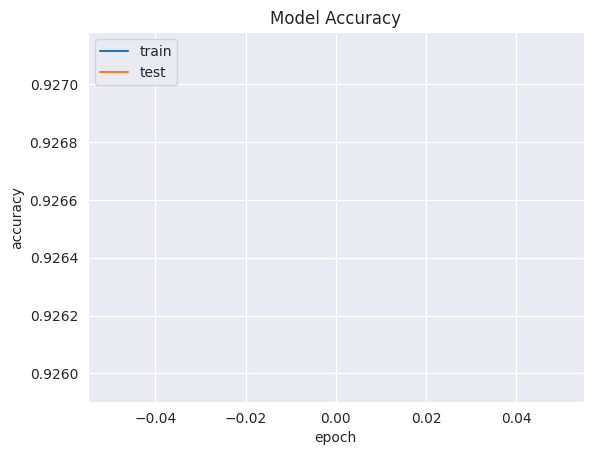

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

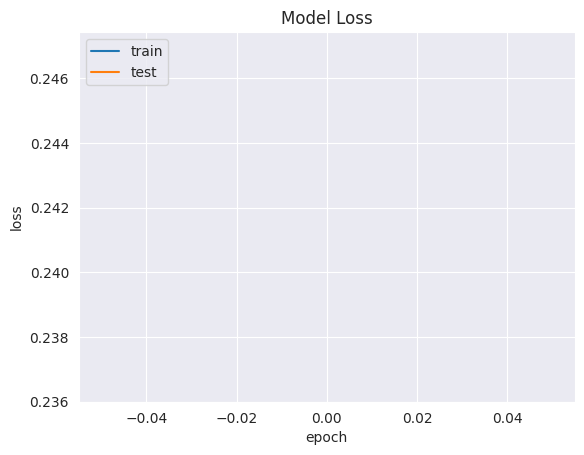

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

# Cek apakah akurasi memenuhi syarat minimal
if train_accuracy >= 0.91 and val_accuracy >= 0.91:
    print("Model memenuhi syarat akurasi minimal.")
else:
    print("Model tidak memenuhi syarat akurasi minimal.")

Model memenuhi syarat akurasi minimal.
